In [1]:
#imports
import numpy as np
import astropy 
from astropy.io import ascii
from astropy.io import fits
from astropy.table import Table, Column, join, vstack
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import LogNorm
from pylab import *
from astropy import units as u
from astropy.coordinates import SkyCoord
from matchCatalog import matchCatalog
%matplotlib inline

In [2]:
#read in catalogs
variable = ascii.read('../../panSTARRS/VariableSelectedv2_Hcut.txt')
IRExcess = ascii.read('../../KoenigSelectedCatalogs/Orion/SelectionV2/CottleIR_Excess_Selection_v2_APOGEELimits.txt')

In [3]:
max(IRExcess['dec'])

13.821426300000001

In [4]:
#cross match variable and IR Excess
VariableCoord = SkyCoord(variable['ra'], variable['dec'], unit = 'deg')
CottleCoord = SkyCoord(IRExcess['ra'], IRExcess['dec'], unit = 'deg')
VCottle, cottleDist = matchCatalog(VariableCoord, CottleCoord, 3.0, False)
print 'IR Excess:', len(IRExcess)
print 'Variable:', len(variable)
print 'Both:', len(VCottle)

IR Excess: 1729
Variable: 1763
Both: 486


In [5]:
rightrange = []
for i in range(len(IRExcess)):
    if IRExcess['dec'][i] < 10.0:
        rightrange.append(i)

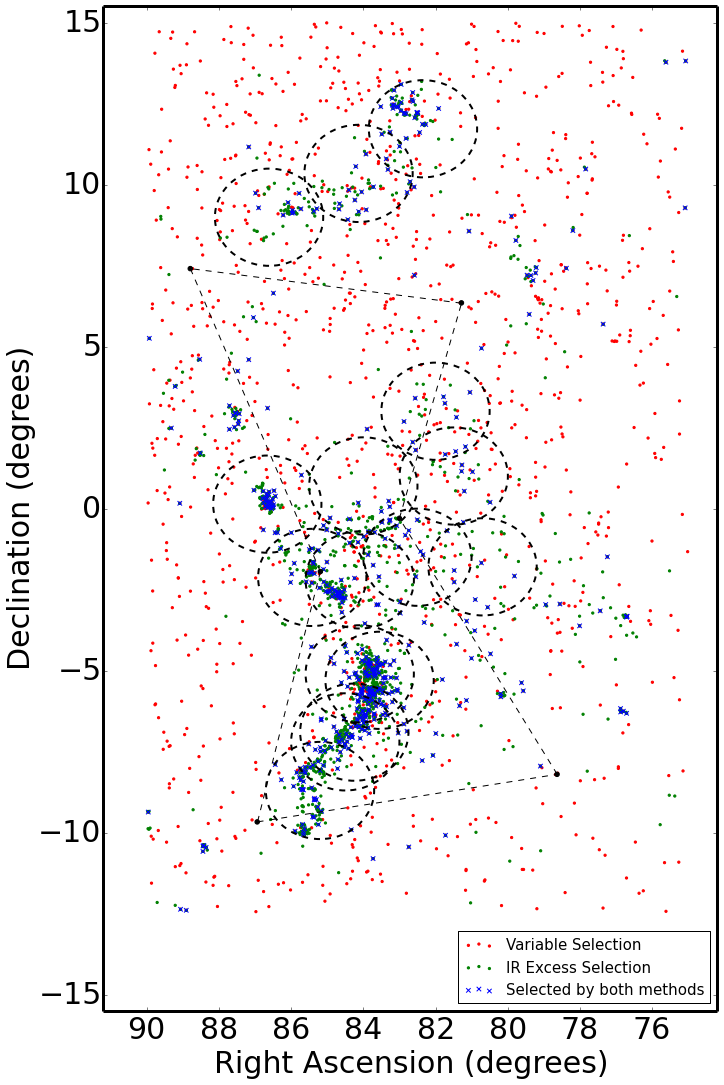

In [9]:
#spatial plot
rcParams['axes.linewidth'] = 3
plt.scatter(variable['ra'], variable['dec'], color = 'red', marker = '.')
plt.scatter(IRExcess['ra'], IRExcess['dec'], color = 'green', marker = '.')
plt.scatter(IRExcess['ra'][VCottle], IRExcess['dec'][VCottle], color = 'blue', marker = 'x')

plt.legend(('Variable Selection', 'IR Excess Selection', 'Selected by both methods'), loc = 4, fontsize = '15')

#Orion pointer stars
plt.scatter([88.792939, 78.634467, 81.282763, 83.001667, 85.189694, 86.939120], 
            [7.407064, -8.201638, 6.349703, -0.299095,  -1.942574, -9.669605], color = 'black')
plt.plot([88.79,85.189], [7.407, -1.9425], color = 'black', linestyle = 'dashed')
plt.plot([85.189,86.93], [-1.9425, -9.669], color = 'black', linestyle = 'dashed')
plt.plot([86.93, 78.63], [ -9.669, -8.2016], color = 'black', linestyle = 'dashed')
plt.plot([78.63, 83.00], [  -8.2016, -0.299], color = 'black', linestyle = 'dashed')
plt.plot([83.00, 81.28], [ -0.299, 6.34], color = 'black', linestyle = 'dashed')
plt.plot([ 81.28, 88.79], [ 6.34, 7.407], color = 'black', linestyle = 'dashed')

plt.xlabel("Right Ascension (degrees)")
plt.ylabel("Declination (degrees)")
#For Lambda Ori
plt.xlim(91.2,74.2)
plt.ylim(-15.5,15.5)



#APOGEE2 Circles
#6 visit OrionB fields
circle6=plt.Circle((86.66,0.1379),1.5,color='black', fill = False, linestyle = 'dashed', linewidth = 2)
circle7=plt.Circle((85.415,-2.124),1.5,color='black', fill = False, linestyle = 'dashed', linewidth = 2)
#3 visit OrionOB1AB fields
circle8=plt.Circle((84.099,-2.201),1.5,color='black', fill = False, linestyle = 'dashed', linewidth = 2)
circle9=plt.Circle((84.0,0.7),1.5,color='black', fill = False, linestyle = 'dashed', linewidth = 2)
circle10=plt.Circle((82.502,-1.5011),1.5,color='black', fill = False, linestyle = 'dashed', linewidth = 2)
circle11=plt.Circle((80.697,-1.798),1.5,color='black', fill = False, linestyle = 'dashed', linewidth = 2)
circle12=plt.Circle((81.496,1.005),1.5,color='black', fill = False, linestyle = 'dashed', linewidth = 2)
circle13=plt.Circle((82.001,3.005),1.5,color='black', fill = False, linestyle = 'dashed', linewidth = 2)
#circle14=plt.Circle((84.517,-7.034),1.5,color='#ea0fd5', fill = False, linestyle = 'dashed')
#OrionL1641 fields (covered by APOGEE1 circles, so color doesn't matter)
circle15=plt.Circle((84.1, -5.1),1.5,color='black', fill = False, linestyle ='dashed', linewidth = 2)
circle16=plt.Circle((83.55, -5.3),1.5,color= 'black', fill = False, linestyle = 'dashed', linewidth = 2)
circle17=plt.Circle((84.25, -6.9),1.5,color='black', fill = False, linestyle = 'dashed', linewidth = 2)
circle18=plt.Circle((84.5, -7.2),1.5,color='black', fill = False, linestyle = 'dashed', linewidth = 2)
circle19=plt.Circle((85.2, -8.7),1.5,color='black', fill = False, linestyle = 'dashed', linewidth = 2)
#6-visit LambdaOriA field
circle25=plt.Circle((84.133, 10.345),1.5,color='black', fill = False, linestyle = 'dashed', linewidth = 2)
#3-visit LambdaOriB+C fields
circle26=plt.Circle((82.348, 11.723),1.5,color='black', fill = False, linestyle = 'dashed', linewidth = 2)
circle27=plt.Circle((86.611, 8.993 ),1.5,color='black', fill = False, linestyle = 'dashed', linewidth = 2)

#APOGEE1 Circles
circle20=plt.Circle((84.1, -5.1),1.5,color='red', fill = False, linewidth = 3)
circle21=plt.Circle((83.55, -5.3),1.5,color='red', fill = False, linewidth = 3)
circle22=plt.Circle((84.25, -6.9),1.5,color='#4c7cff', fill = False, linewidth = 3)
circle23=plt.Circle((84.5, -7.2),1.5,color='#00ffbb', fill = False, linewidth = 3)
circle24=plt.Circle((85.2, -8.7),1.5,color='#4c7cff', fill = False, linewidth = 3)


fig = plt.gcf()
fig.gca().add_artist(circle6)
fig.gca().add_artist(circle7)
fig.gca().add_artist(circle8)
fig.gca().add_artist(circle9)
fig.gca().add_artist(circle10)
fig.gca().add_artist(circle11)
fig.gca().add_artist(circle12)
fig.gca().add_artist(circle13)
#fig.gca().add_artist(circle14)
#fig.gca().add_artist(circle20)
#fig.gca().add_artist(circle21)
#fig.gca().add_artist(circle22)
#fig.gca().add_artist(circle23)
#fig.gca().add_artist(circle24)
fig.gca().add_artist(circle25)
fig.gca().add_artist(circle26)
fig.gca().add_artist(circle27)

fig.gca().add_artist(circle15)
fig.gca().add_artist(circle16)
fig.gca().add_artist(circle17)
fig.gca().add_artist(circle18)
fig.gca().add_artist(circle19)


plt.rc('font', size = 30) #establishes a default font size
fig = plt.gcf()
fig.set_size_inches(11, 18)
#fig.savefig('../../PanSTARRS/Variable_and_IR_Spatial_v2_paper.pdf')